In [57]:
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_data"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [58]:
df_DA_PL = df[(df["job_country"] == "Poland") & (df['job_title_short'] == 'Data Analyst')]

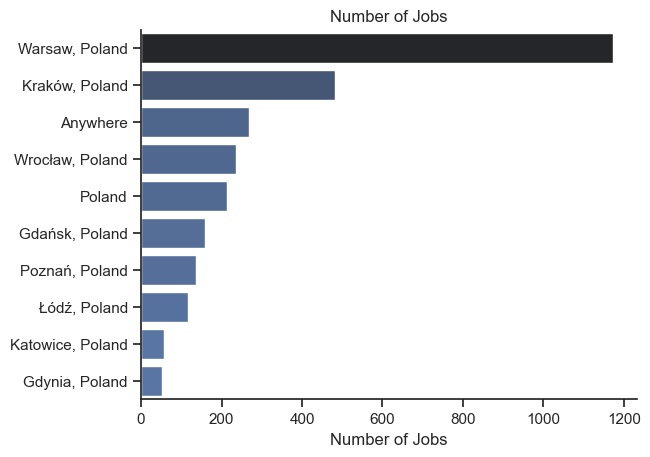

In [59]:
df_plot = df_DA_PL["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x ="count", y="job_location", hue="count", palette='dark:b_r', legend=False)
sns.despine()
plt.title("Number of Jobs")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

0
1


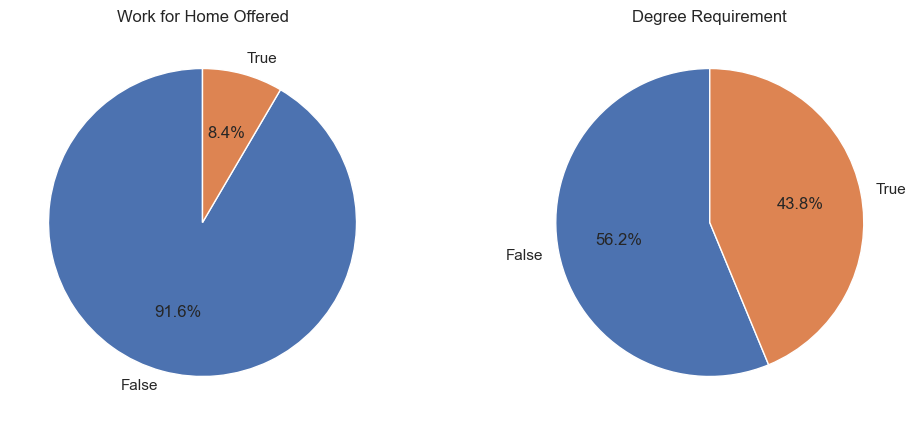

In [63]:
dict_column = {
    'job_work_from_home': "Work for Home Offered",
    "job_no_degree_mention": "Degree Requirement",
    # "job_health_insurance": "Health Insurance Offered"
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    print(i)
    ax[i].pie(df_DA_PL[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)



plt.show()


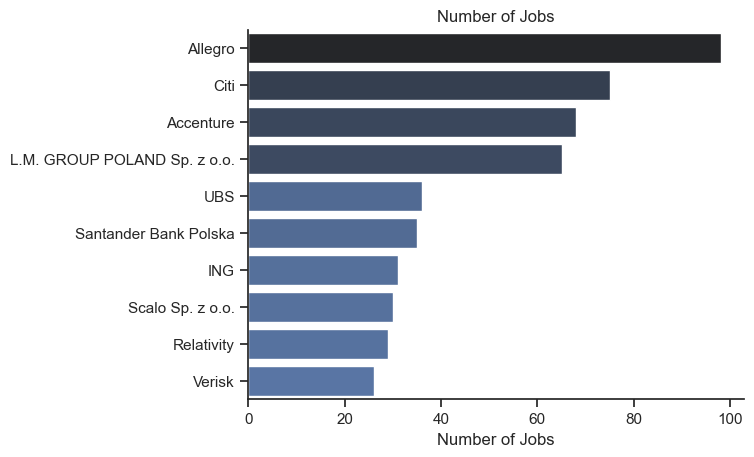

In [65]:
df_plot = df_DA_PL["company_name"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x ="count", y="company_name", hue="count", palette='dark:b_r', legend=False)
sns.despine()
plt.title("Number of Jobs")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()